In [1]:
from google.colab import drive
drive.mount("/content/drive") #Mounting google drive to access dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/dataset/Housing.csv')
df.head() #Importing csv file

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.isnull().sum() #Checking null values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder() #Applying ordinal encoder
df['mainroad'] = enc.fit_transform(df[['mainroad']])
df['guestroom'] = enc.fit_transform(df[['guestroom' ]])
df['basement'] = enc.fit_transform(df[['basement' ]])
df['hotwaterheating'] = enc.fit_transform(df[['hotwaterheating']])
df['airconditioning'] = enc.fit_transform(df[['airconditioning']])
df['prefarea'] = enc.fit_transform(df[['prefarea']])

df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3       1.0        0.0   
1  12250000  8960         4          4        4       1.0        0.0   
2  12250000  9960         3          2        2       1.0        0.0   
3  12215000  7500         4          2        2       1.0        0.0   
4  11410000  7420         4          1        2       1.0        1.0   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0       0.0              0.0              1.0        2       1.0   
1       0.0              0.0              1.0        3       0.0   
2       1.0              0.0              0.0        2       1.0   
3       1.0              0.0              1.0        3       1.0   
4       1.0              0.0              1.0        2       0.0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

In [6]:
rank=['unfurnished', 'semi-furnished', 'furnished']
oe = OrdinalEncoder(categories=[rank])
df['furnishingstatus']=oe.fit_transform(df[['furnishingstatus']]) #Applying ordinal encoder

In [7]:
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3       1.0        0.0   
1  12250000  8960         4          4        4       1.0        0.0   
2  12250000  9960         3          2        2       1.0        0.0   
3  12215000  7500         4          2        2       1.0        0.0   
4  11410000  7420         4          1        2       1.0        1.0   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0       0.0              0.0              1.0        2       1.0   
1       0.0              0.0              1.0        3       0.0   
2       1.0              0.0              0.0        2       1.0   
3       1.0              0.0              1.0        3       1.0   
4       1.0              0.0              1.0        2       0.0   

   furnishingstatus  
0               2.0  
1               2.0  
2               1.0  
3               2.0  
4               2.0

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #importing libraries

<Axes: xlabel='price', ylabel='Density'>

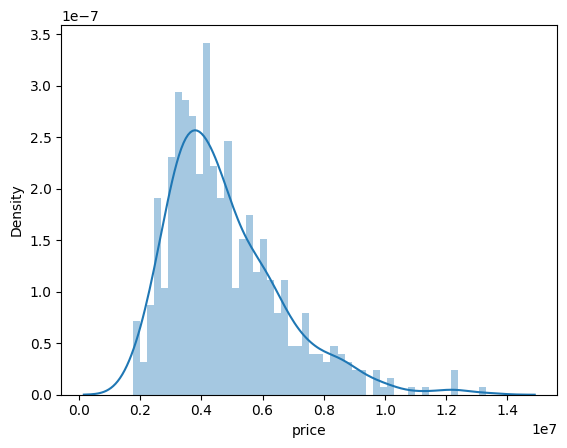

In [9]:
sns.distplot(df['price'], bins=50) # checking imbalance issue

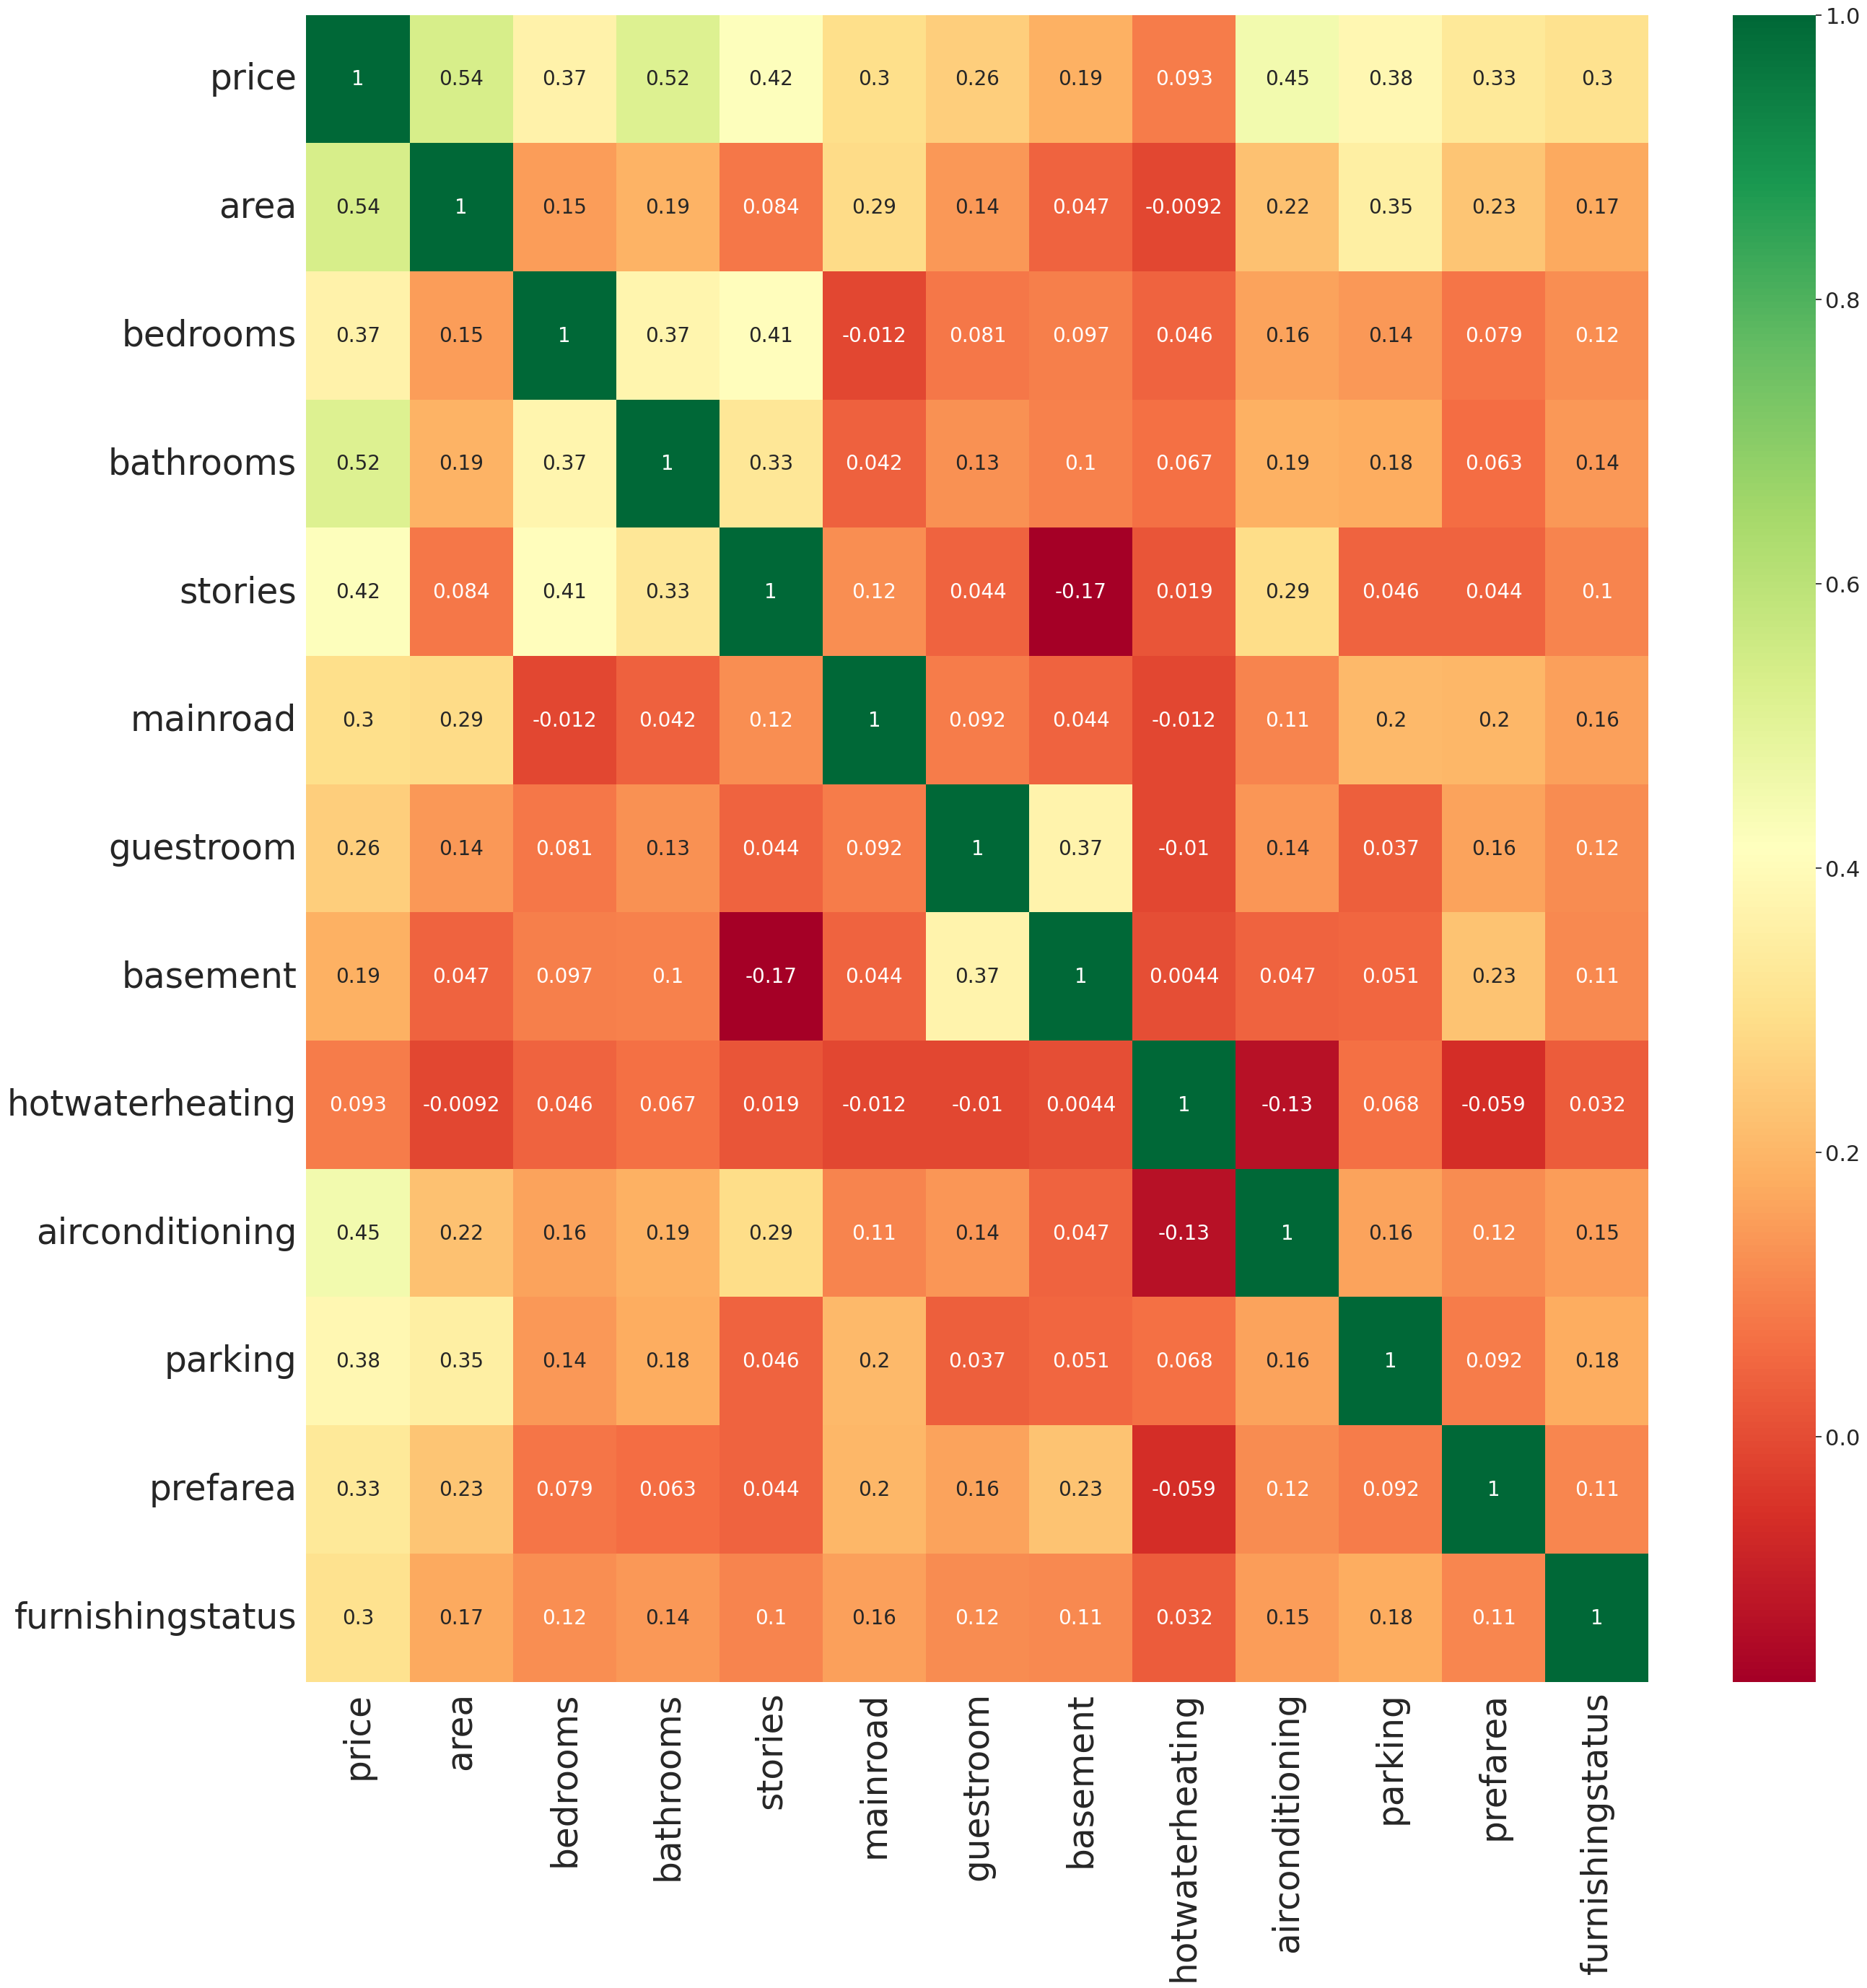

In [10]:
sns.set(font_scale=2)
plt.subplots(figsize=(30,30))
heat_plot= sns.heatmap(df.corr(method='pearson'), annot=True, cmap= 'RdYlGn', annot_kws={'size': 20})
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)

plt.show() #Correlation matrix

In [11]:
X=df.drop(['price'],axis=1)
y=df['price'] #Dividing features and target

In [12]:
print(X.shape) #checking shape
print(y.shape)

(545, 12)
(545,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #spliting the dataset

In [14]:
from sklearn.preprocessing import MinMaxScaler # Minmax scaler applying

scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [15]:
X_train

array([[0.30309278, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.15120275, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.20591065, 0.4       , 0.        , ..., 0.66666667, 0.        ,
        0.5       ],
       ...,
       [0.44329897, 0.6       , 0.        , ..., 0.66666667, 1.        ,
        1.        ],
       [0.09278351, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.22749141, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #Defining Linear Regression model

# **y = Wx + b;**
same as y = mx + c
W is weight(slope) b is bias (intercept term / constant )

In [17]:
reg.fit(X_train,y_train) #fitting the model

LinearRegression()

In [18]:
y_pred = reg.predict(X_test) # generating prediction

In [19]:
y_pred

array([8237187.76131823, 5077861.77147773, 5017862.33363821,
       3802645.47362395, 3305641.90286001, 7792993.36228176,
       5663987.09430008, 5290201.70768402, 4981510.65878811,
       6601803.04179458, 6339004.97090952, 4142254.94836477,
       4074580.92408538, 4825428.49823539, 2763426.06227832,
       7268711.99378757, 7509610.98457994, 6755870.31510514,
       5654220.90450826, 4053376.93121914, 5237607.25525089,
       4474960.10531523, 3816937.41291111, 7557137.27132558,
       5331335.49180966, 2961068.98842723, 8372693.57950133,
       3302810.36378437, 4512375.25836894, 4673040.42246761,
       5672848.25720958, 5143700.81853994, 2163738.75511032,
       5962791.91916397, 4837110.32205241, 2699597.88195677,
       3087332.72308667, 3242235.98325833, 4806349.96961   ,
       7759067.26344695, 4787685.46794163, 3079268.59301974,
       3620231.62437625, 5419610.0683702 , 9620800.10913857,
       4166773.55981239, 8778876.36030157, 3498052.86520693,
       4235226.14650986,

In [20]:
 y_test

102    6195000
285    4235000
418    3360000
202    4900000
489    2835000
        ...   
472    3010000
401    3500000
70     6790000
310    4130000
145    5600000
Name: price, Length: 109, dtype: int64

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

In [22]:
R2= r2_score(y_pred,y_test)
R2 #R2 acore 0 - 1

0.5369636695380029

In [23]:
MSE = mean_squared_error(y_pred,y_test)
MSE #Mean squred error

1594966734832.0488

In [24]:
RMSE= math.sqrt(MSE)
RMSE #Root mean squred error

1262919.9241567333

In [25]:
MAE= mean_absolute_error(y_pred, y_test)
MAE #Mean absolute error

929326.0510865405